In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = np.genfromtxt('winequality.csv', delimiter=',', names=True)

In [3]:
(data['color']).mean()

0.2461135908881022

In [4]:
names = data.dtype.names

fig, axs = plt.subplots(len(names)-2, len(names), figsize=(50, 50))

for i, xname in enumerate(names[:-2]):
    for j, yname in enumerate(names[i:]):
        j = i + j
        axs[i, j].scatter(
            data[xname],
            data[yname],
            s=0.5,
            alpha=0.5,
            c=1-data['color']
        )
        axs[i, j].set_xlabel(xname)
        axs[i, j].set_ylabel(yname)

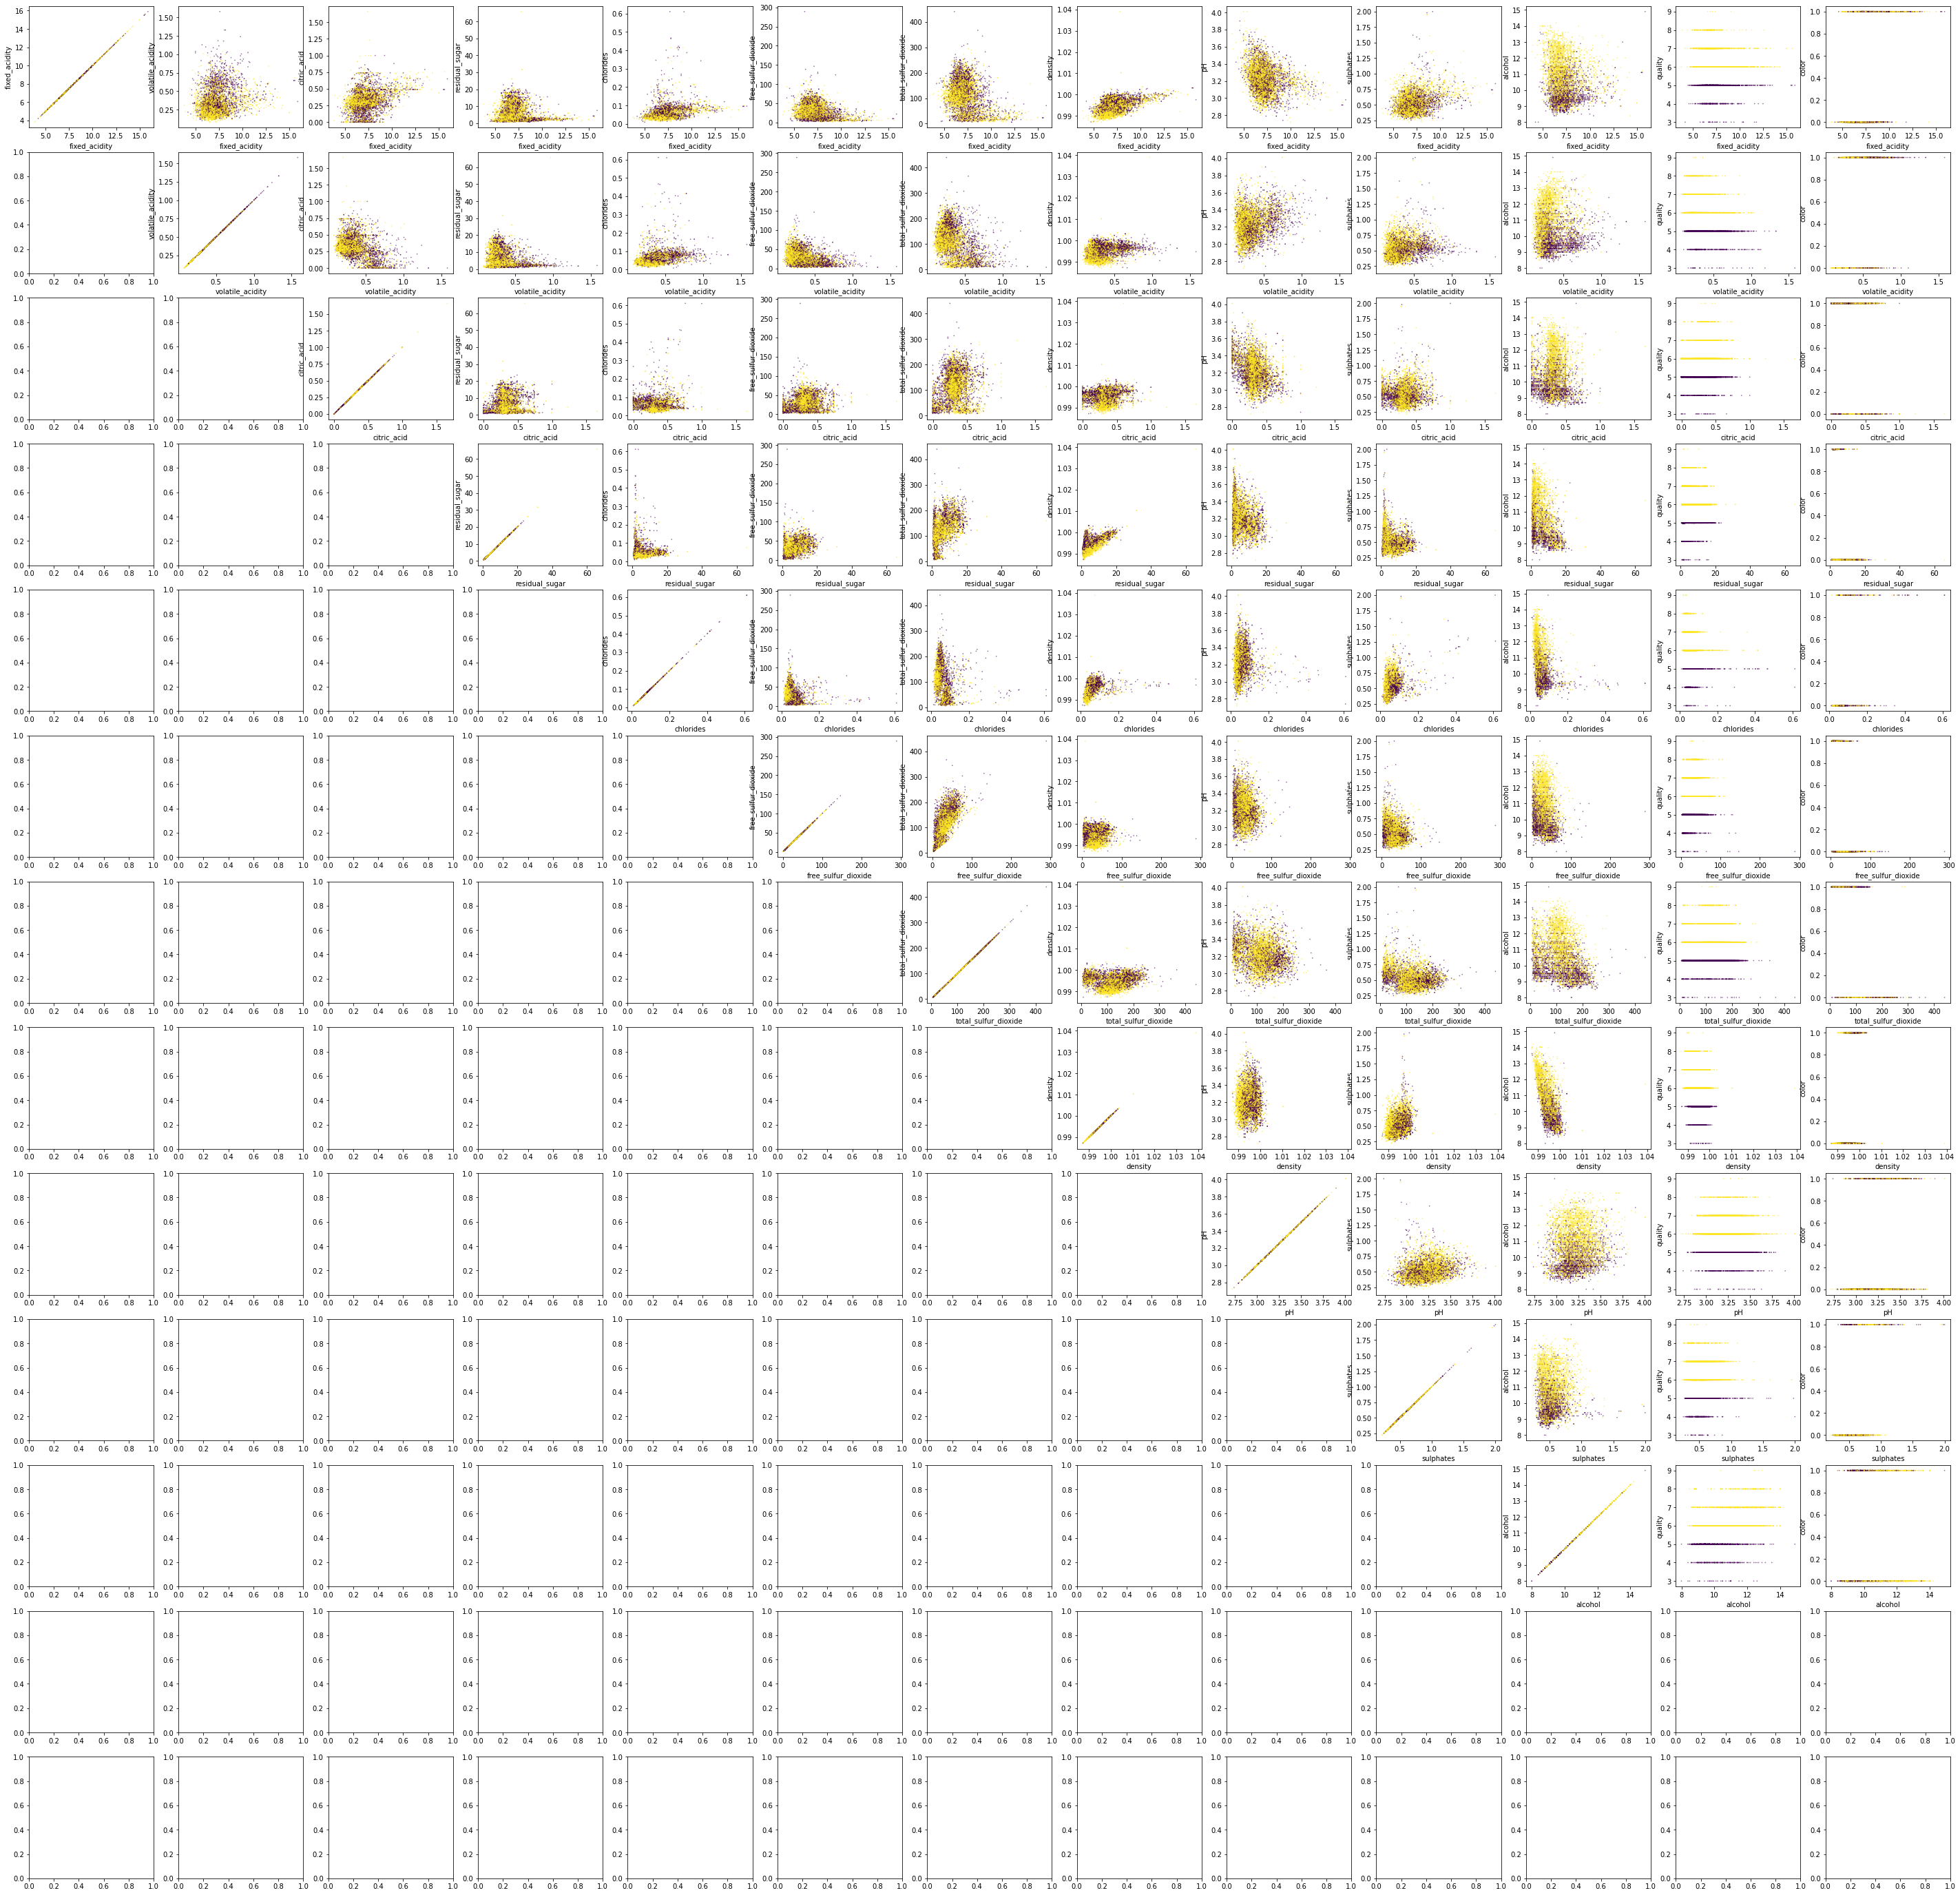

In [ ]:
fig, axs = plt.subplots(len(names), len(names), figsize=(50, 50))

for i, xname in enumerate(names[:-2]):
    for j, yname in enumerate(names[i:]):
        j = i+j
        axs[i, j].scatter(
            data[xname],
            data[yname],
            s=0.5,
            alpha=0.5,
            c=data['quality']
        )
        axs[i, j].set_xlabel(xname)
        axs[i, j].set_ylabel(yname)

In [ ]:
from mpl_toolkits import mplot3d

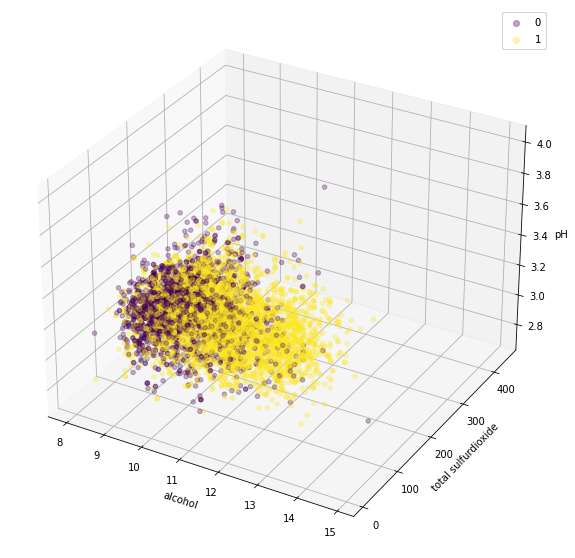

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(
        data['alcohol'],
        data['total_sulfur_dioxide'],
        data['pH'], 
        # s=10,
        alpha=0.3,
        c=data['quality'] > 5
)
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfurdioxide')
ax.set_zlabel('pH')

# ax.add_artist(ax.legend(scatter.legend_elements(prop='colors')[0], ['red', 'white']))
ax.add_artist(ax.legend(*scatter.legend_elements(prop='colors')))

In [ ]:
arr = data.view((float, len(data.dtype.names)))
x = arr[:, :-2]
y = arr[:, -2] > 5

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7369230769230769


In [ ]:
cm = metrics.confusion_matrix(y_test, logisticRegr.predict(x_test))
print(cm)

[[255 213]
 [129 703]]


In [ ]:
# svm
from sklearn.svm import SVC
# logistic regression
from sklearn.linear_model import LogisticRegression
# neural network
from sklearn.neural_network import MLPClassifier

In [ ]:
# normalize x
x2 = (x - x.mean(axis=0)) / x.std()
y2 = arr[:, -2] > 5
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=0)
regrs = {
    "linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "logistic regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "Neural network": MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(30, 30), random_state=1),
}
L = max(len(n) for n in regrs.keys())

for r in regrs.values():
    r.fit(x2_train, y2_train)

/home/paulm/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paulm/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [89]:
for name, r in regrs.items():
    print(f"{name:{L}} : {r.score(x2_test, y2_test)}")

linear SVM          : 0.7246153846153847
RBF SVM             : 0.7315384615384616
logistic regression : 0.7323076923076923
Neural network      : 0.7369230769230769


In [90]:
for name, r in regrs.items():
    # print confusion matrix
    print(f"{name}:\n{metrics.confusion_matrix(y2_test, r.predict(x2_test))}")

linear SVM:
[[244 224]
 [134 698]]
RBF SVM:
[[122 346]
 [  3 829]]
logistic regression:
[[247 221]
 [127 705]]
Neural network:
[[261 207]
 [135 697]]


In [101]:
from sklearn.model_selection import learning_curve

No handles with labels found to put in legend.


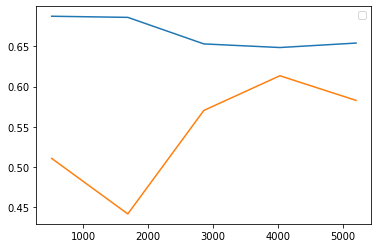

In [119]:
sizes, trains, tests = learning_curve(regrs['logistic regression'], x2, y2)

plot = plt.plot(sizes, trains.mean(axis=0), )
plot = plt.plot(sizes, tests.mean(axis=0))
plt.legend()

In [114]:
trains.mean(axis=0)

array([0.68743079, 0.68603557, 0.65301549, 0.64851539, 0.65406745])